# Will it be delayed?

Everyone who has flown has experienced a delayed or cancelled flight. Both airlines and airports would like to improve their on-time performance and predict when a flight will be delayed or cancelled several days in advance. You are being hired to build a model that can predict if a flight will be delayed. To learn more, you must schedule a meeting with your client (me). To schedule an appointment with your client, send an event request through Google Calendar for a 15 minute meeting. Both you and your project partner must attend the meeting. Come prepared with questions to ask your client. Remember that your client is not a data scientist and you will need to explain things in a way that is easy to understand. Make sure that your communications are efficient, thought out, and not redundant as your client might get frustrated and "fire" you (this only applies to getting information from your client, this does not necessary apply to asking for help with the actual project itself - you should continuously ask questions for getting help).

For this project you must go through most all steps in the checklist. You must write responses for all items as done in the homeworks, however sometimes the item will simply be "does not apply". Keep your progress and thoughts organized in this document and use formatting as appropriate (using markdown to add headers and sub-headers for each major part). Some changes to the checklist:

* Do not do the final part (launching the product).
* Your presentation will be done as information written in this document in a dedicated section (no slides or anything like that). It should include high-level summary of your results (including what you learned about the data, the "accuracy" of your model, what features were important, etc). It should be written for your client, not your professor or teammates. It should include the best summary plots/graphics/data points.
* The models and hyperparameters you should consider during short-listing and fine-tuning will be released at a later time (dependent on how far we get over the next two weeks).
* Data retrieval must be automatic as part of the code (so it can easily be re-run and grab the latest data). Do not commit any data to the repository.
* Your submission must include a pickled final model along with this notebook.

Frame the Problem
=====================================

1. **Define the objective in business terms:** 
    We are being hired by Dr. Jeff "client" Bush who is looking for a ML model that can detect delayed and cancled flights before they occur.
2. **How will your solution be used?** 
    Our model will be used to quicken the regulation process, allowing penalisations to occur faster pressuring airlines to fix their problems sooner, hopefully decreasing delayed/canceled flights in the process.
3. **What are the current solutions/workarounds (if any)?** 
    Currently airlines are being penalized by the Department of Transportation, although this process has led to a decrease in delayed/canceled flights, it is an extremely slow process.
4. **How should you frame this problem?** 
    This is a classification problem since the goal is to predict whether a flight will be delayed or canceled based on historical data. The model will be trained on a labeled dataset where flights are categorized as on-time, delayed, or canceled, allowing it to learn patterns that contribute to disruptions. Since the predictions are intended to assist in regulatory enforcement rather than real time operational decisions, the model does not need to function as an online system. However, given the large volume of flight data, considerations for scalability and batch processing may be necessary. If real time predictions become a future requirement, the architecture may need adjustments to handle streaming data efficiently.
5. **How should performance be measured? Is the performance measure aligned with the business objective?** 
    Performance is measured by precision, making sure that flights are not marked as delayed when they would be on time. In otherwords, avoiding false positives. The performance measure is aligned with the business objective as flights that are falsely marked as delayed could lead to unnecessary ticket refunds.
6. **What would be the minimum performance needed to reach the business objective?** 
    The minimum performance required is 75%, so long as 75% of flights marked as delayed/canceled are marked correctly we would reach our business objective set by the client.
7. **What are comparable problems? Can you reuse (personal or readily available) experience or tools?** 
    We have worked with predicting the status of a certain object through observing patterns and behaviors before with our divvy-data assignment. Looking at correlations of what makes a member, or in this case a delayed flight, will give us a good idea on the best way to determine the chances of a flight being delayed or canceled.
8. **Is human expertise available?** 
    Yes, through our client
9. **How would you solve the problem manually?**
    Manually predicting flight delays and cancellations would involve analyzing historical flight data, identifying key factors such as weather conditions, airline performance, airport congestion, and mechanical issues. A rule-based approach could be used, where past trends inform probability assessments, for example, if an airline has a history of delays on a particular route or adverse weather is forecasted, the likelihood of delay increases. This process would require cross-referencing multiple data sources, such as FAA advisories and airline reports, to validate predictions. While feasible on a small scale, manual prediction is not scalable due to the complexity and volume of data, making machine learning a more efficient solution.
10. **List the assumptions you (or others) have made so far. Verify assumptions if possible.** 
    Flight delays and cancellations are predictable based on historical patterns.
    The available data is accurate and comprehensive although airlines may underreport delays.
    Faster penalization will incentivize airlines to improve service quality.
    Prioritizing precision over recall aligns with business objectives, though recall may also be important (detecting delays more often).


Get the Data
============

1. **List the data you need and how much you need:**
    - Flight Data from 2023-2024
    - Ideas: Days that may be taken off by employees (holidays). 
2. **Find and document where you can get that data:**
    - The data is available on the Beauru of Transportation website, and is saved in the flights_data csv.
3. **Get access authorizations**:
   - Public Data.
4. **Create a workspace**: 
    - This notebook.
5. **Get the data**: 
    - Data is available via download from the Beauru of Transportation website.
6. **Convert the data to a format you can easily manipulate**:
   - The data came in 24 separate zipped files and is now in a single csv file    

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import boto3
import zipfile
import requests
import io
import os
from sklearn.model_selection import train_test_split 

In [3]:
def download_flights_data():
    df_list = []
    
    for filename in os.listdir("/Users/derekh/Desktop/neural networks/PROJ-Delayed-Real"):

        if filename.endswith('.csv'):
            file_path = os.path.join("/Users/derekh/Desktop/neural networks/PROJ-Delayed-Real", filename)
            df = pd.read_csv(file_path)
            df_list.append(df)
    
    data = pd.concat(df_list, ignore_index=True)
    
    data.to_csv('flights_data.csv', index=False)
    return pd.read_csv('flights_data.csv')

def load_flights_data():
    if os.path.exists('flights_data.csv'):
        print('flights_data.csv already exists, skipping download')
        data = pd.read_csv('flights_data.csv')
    else:
        print('Downloading flights data...')
        data = download_flights_data()
    return data

In [4]:
flights_data = load_flights_data()

flights_data.csv already exists, skipping download


/var/folders/kv/gjc128490fx1b6q6mtfm45bc0000gp/T/ipykernel_47668/3967089165.py:19: DtypeWarning: Columns (11,13,57) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('flights_data.csv')


In [5]:
flights_data.shape

(14825707, 73)

In [41]:
flights_data.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,...,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime
0,2023,4,12,30,6,12/30/23,DL,DL_CODESHARE,19790,DL,...,660,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023,4,12,30,6,12/30/23,DL,DL_CODESHARE,19790,DL,...,660,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023,4,12,1,5,12/1/23,DL,DL_CODESHARE,19790,DL,...,888,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023,4,12,3,7,12/3/23,DL,DL_CODESHARE,19790,DL,...,888,4,0.0,0.0,21.0,0.0,23.0,NaN,NaN,NaN
4,2023,4,12,4,1,12/4/23,DL,DL_CODESHARE,19790,DL,...,888,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**ArrDel15/DepDel15/Cancelled** - Project labels that define whether a flight is delayed or cancleled.

**Missing Values:** WeatherDelay, NASDelay, SecurityDelay

**Distance** - the distance of a flight may be helpful in detecting whether or not a flight is delayed or canceled as they required more meticulous planning and complex scheduling dependancies.

**Origin/Dest** - Could be useful for detecting regional effects like severe weather or congestion.

**CRSDepTime/CRSArrTime** - The scheduled depature and arrival time for flights, determines whether the flight is at "peak hours" or "off peak" which could impact delays.

In [7]:
flights_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14825707 entries, 0 to 14825706
Data columns (total 73 columns):
 #   Column                                              Dtype  
---  ------                                              -----  
 0   Year                                                int64  
 1   Quarter                                             int64  
 2   Month                                               int64  
 3   DayofMonth                                          int64  
 4   DayOfWeek                                           int64  
 5   FlightDate                                          object 
 6   Marketing_Airline_Network                           object 
 7   Operated_or_Branded_Code_Share_Partners             object 
 8   DOT_ID_Marketing_Airline                            int64  
 9   IATA_Code_Marketing_Airline                         object 
 10  Flight_Number_Marketing_Airline                     float64
 11  Originally_Scheduled_Code_Share_Air

In [8]:
# percentage missing number of values for FlightDate
flights_data['OriginAirportID'].isnull().sum() / flights_data.shape[0]

0.0

In [9]:
flights_data['Flight_Number_Marketing_Airline'].value_counts()

Flight_Number_Marketing_Airline
555.0     6511
777.0     6216
540.0     6040
323.0     6029
354.0     5918
          ... 
6695.0       1
6644.0       1
6662.0       1
6661.0       1
6668.0       1
Name: count, Length: 6995, dtype: int64

| Attribute          | Type             | Missing | Noise                                                              | Usefulness   | Distribution                                  |
| ------------------ | ---------------- | ------- | ------------------------------------------------------------------ | ------------ | --------------------------------------------- |
| Year      | datetime      | 0%      | None                                                               | Useful | 2023 or 2024                         |
| Quarter            | datetime             | 0%      | None                                                               | Useful   | 1-4                             |
| Month      | categorical      | 0%      | None                       | Useful       | 1-12 |
| DayOfMonth         | datetime         | 0%      | None                                                               | Useful       | 1-31          |
| DayOfWeek           | datetime         | 0%      | None                                                               | Useful       | 1-7          |
| FlightDate | datetime             | 0%     | None                   | Not useful. Year, Month, DayofMonth tell us this info already    | dates from 1/1/23-12/30/24          |
| Marketing_Airline_Network   | text             | 0%     | None              | Possibly    | Airline that markets the flight          |
| Operated_or_Branded_Code_Share_Partners      | text  | 0%      | none         | Minimally       | N/A           |
| DOT_ID_Marketing_Airline   | numerical             | 0%     | None                   | Possibly    | ID for marketing airline          |
| IATA_Code_Marketing_Airline     | numerical             | 0%     | None              | Not useful    | N/A         |
| Flight_Number_Marketing_Airline        | numerical  | 0%    | None         | Not useful       | N/A           |
| distance*          | numerical (km)   | 0.1%    | Lots of 0s, some very high values; not true distance; round trips? | Possibly     | Peak at 5m and 1.3 km                         |
| start_to_center*   | numerical (km)   | 0.001%  | Some very high values                                              | Not useful   | Peak at ~2 km                                 |
| end_to_center*     | numerical (km)   | 0.1%    | Some very high values                                              | Not useful   | Peak at ~2 km                                 |
| duration*          | numerical (min)  | 0%      | Some negative or very high values                                  | Useful       | Peak at 7 minutes, log-normal                 |
| speed*             | numerical (km/h) | 0.2%    | Lots of 0s; some very high values; not true speeds; round trips?   | Possibly     | Peak at 13 km/h, almost log-normal            |
| workday            | boolean          | 0%      | Not all holidays included, and not all are observed equally        | Useful       | 67% workday, 33% weekend (expected ~70%/30%)  |

In [10]:
flights_data.describe()

,Year,Quarter,Month,DayofMonth,DayOfWeek,DOT_ID_Marketing_Airline,Flight_Number_Marketing_Airline,DOT_ID_Originally_Scheduled_Code_Share_Airline,Flight_Num_Originally_Scheduled_Code_Share_Airline,DOT_ID_Operating_Airline,...,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime
count,1.482571e+07,1.482571e+07,1.482571e+07,1.482571e+07,1.482571e+07,1.482571e+07,1.482571e+07,1603.000000,1603.000000,1.482571e+07,...,1.482571e+07,1.482571e+07,2.995616e+06,2.995616e+06,2.995616e+06,2.995616e+06,2.995616e+06,102229.000000,102210.000000,102210.000000
mean,2.023509e+03,2.528918e+00,6.586377e+00,1.577153e+01,3.983661e+00,1.982673e+04,2.551421e+03,20340.041173,5161.464754,1.996517e+04,...,8.066236e+02,3.700077e+00,2.489971e+01,4.090163e+00,1.300443e+01,1.314020e-01,2.884685e+01,1343.073384,40.823608,39.907553
std,4.999182e-01,1.106852e+00,3.403419e+00,8.781058e+00,2.007278e+00,2.825329e+02,1.710155e+03,123.628984,1054.977257,3.748050e+02,...,5.922690e+02,2.325704e+00,7.658620e+01,3.370453e+01,3.139895e+01,3.370272e+00,6.458379e+01,513.825412,35.809893,33.997188
min,2.023000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.939300e+04,1.000000e+00,20046.000000,3068.000000,1.939300e+04,...,1.100000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000
25%,2.023000e+03,2.000000e+00,4.000000e+00,8.000000e+00,2.000000e+00,1.979000e+04,1.154000e+03,20378.000000,4121.000000,1.979000e+04,...,3.730000e+02,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,901.000000,18.000000,18.000000
50%,2.024000e+03,3.000000e+00,7.000000e+00,1.600000e+01,4.000000e+00,1.980500e+04,2.233000e+03,20378.000000,5749.000000,1.993000e+04,...,6.490000e+02,3.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1353.000000,30.000000,30.000000
75%,2.024000e+03,4.000000e+00,1.000000e+01,2.300000e+01,6.000000e+00,1.997700e+04,3.777000e+03,20398.000000,6095.000000,2.036800e+04,...,1.045000e+03,5.000000e+00,2.200000e+01,0.000000e+00,1.700000e+01,0.000000e+00,3.300000e+01,1750.000000,50.000000,49.000000
max,2.024000e+03,4.000000e+00,1.200000e+01,3.100000e+01,7.000000e+00,2.043600e+04,9.887000e+03,20500.000000,6378.000000,2.050000e+04,...,5.095000e+03,1.100000e+01,5.764000e+03,2.419000e+03,2.700000e+03,1.460000e+03,3.581000e+03,2400.000000,423.000000,423.000000


There are a wide range of numerical values, some having significant variance which suggests extreme values or outliers. The features CarrierDelay, WeatherDelay and LateaAircraftDelay have high standard deviatons which infers that most flights experience little to no delay while some flights suffer extreme disruptions.

The data has strong right skewness, particularly in delay-related columns, meaning that a majority of flights operate on time while a smaller number face extreme delays. There is a high variance in numerical attributes, and certain factors like distance, time-of-day, and airline-specific factors will likely be strong predictors of delay probability. Given the class imbalance issue, we should use sampling strategies or weighted loss functions to prevent the model from biasing towards "on-time" predictions. Incorporating categorical transformations, engineered features (e.g., flight distance categories, peak hour indicators), and outlier handling will be important for building an effective model.


In [12]:
# number of diverted flights
flights_data['Diverted'].value_counts()

Diverted
0    14789079
1       36628
Name: count, dtype: int64

Currently 36,628 flights that are diverted. Remove this since they are not being included.

In [13]:
# remove diverted flights from data
flights_data = flights_data[flights_data['Diverted'] == 0]

In [14]:
# number of unique cancellation codes with values for each
flights_data['CancellationCode'].value_counts()

CancellationCode
B    110983
A     57369
C     28235
D       218
Name: count, dtype: int64

A - Carrier cancellation

B - Weather cancellation

C - National Air System cancellation

D - Security cancellation

(-100.0, 300.0)

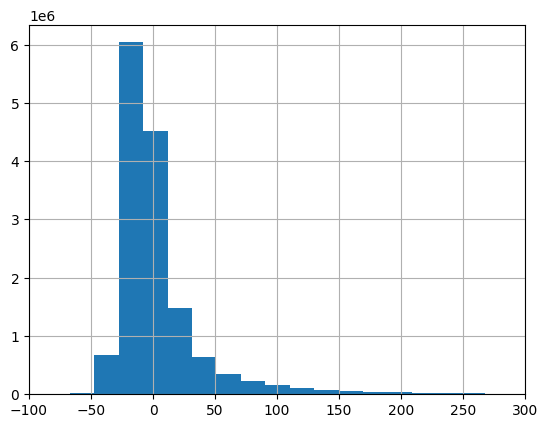

In [15]:
# Arrival delay histogram
flights_data['ArrDelay'].hist(bins=300)
plt.xlim(-100, 300)



(-50.0, 300.0)

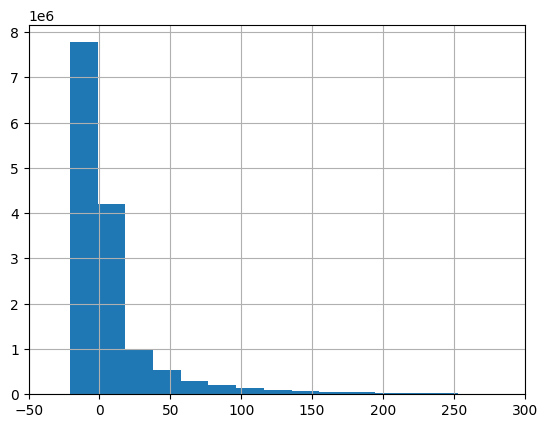

In [16]:
# departure delay histogram
flights_data['DepDelay'].hist(bins=300)
plt.xlim(-50, 300)

(0.0, 250.0)

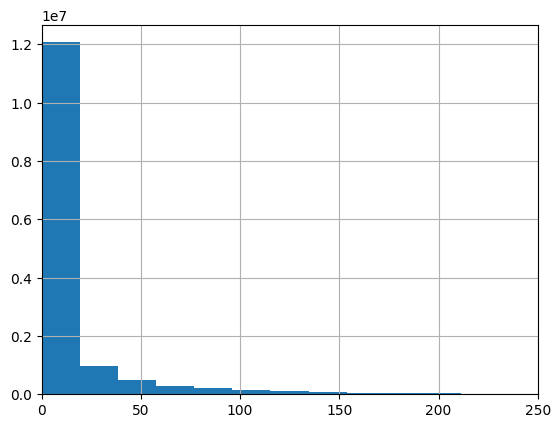

In [17]:
flights_data['DepDelayMinutes'].hist(bins=300)
plt.xlim(0, 250)

In [18]:
# DepDel15 values
flights_data['DepDel15'].value_counts()

DepDel15
0.0    11637669
1.0     2962005
Name: count, dtype: int64

2,962,005 departure flights with delays greater than 15 minutes

In [19]:
flights_data['ArrDel15'].value_counts()

ArrDel15
0.0    11596654
1.0     2995619
Name: count, dtype: int64

2,995,619 arrival flights with delays greater than 15 minutes

Both arrival and departure delays exhibit a strong right-skewed distribution, meaning that most flights either depart and arrive on time or with minor delays, while a small percentage suffer extreme delays. The majority of flights cluster around 0 to 15 minutes of delay, with very few experiencing delays of over 100 minutes. We'll most likely need to use some resampling techniques (oversampling delayed flights, undersampling on-time flights) may be necessary for accurate classification. There is a significant difference in the distributions of arrival and departure delays, with departure delays being more frequent and more tightly clustered around zero compared to arrival delays. This pattern suggests that most departure delays are minor, often caused by short-term operational issues, whereas arrival delays have a greater spread, possibly due to compounding delays from previous flights, weather disruptions, or air traffic congestion. Extreme delays (over 100 minutes) are relatively rare but significantly impact operations and passenger experience, meaning that even though they occur infrequently, they are of high business importance. There is a noticeable gap in the delay distribution where very early departures are much rarer than small positive delays. This suggests that flights are scheduled with a buffer time, and airlines typically do not push for early departures, likely due to regulatory constraints and passenger scheduling expectations.

Overall, most flights will experience little to no delay with a small fraction of flgihts having extreme delays, which are very significant in regards to our business objective. Depature delays are much more frequent but are shorter in duration where arrival delays have a much wider distribution.

<AxesSubplot: xlabel='Month'>

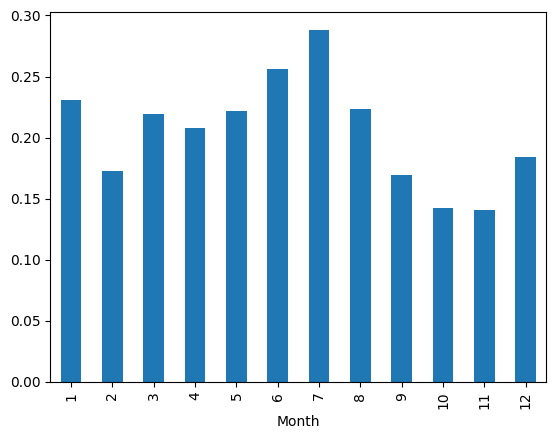

In [20]:
# months with most delays
flights_data.groupby('Month')['ArrDel15'].mean().plot.bar()

July and September have the most arrival and departure delays. This is most likely due to rainy weather during this time of the year. Getting some weather data and exploring with this would be useful.

<AxesSubplot: xlabel='Month'>

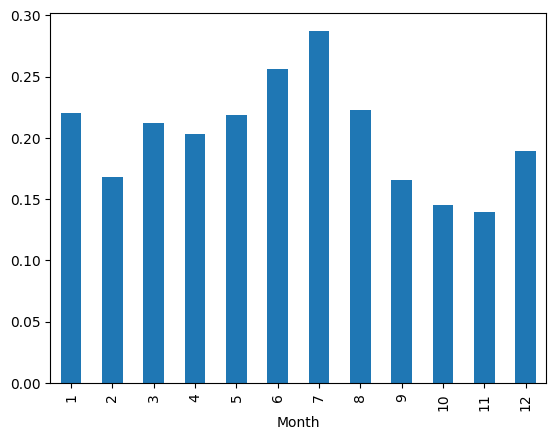

In [21]:
flights_data.groupby('Month')['DepDel15'].mean().plot.bar()

Delays peak in July & June which is probably due to high travel demands and weather conditions. Although weather in winter months could have more harse weather conditions, the lower quantity of travelers are a likely factor to the lower level of delays.

In [22]:
# DepartureDelayGroups
flights_data['DepartureDelayGroups'].value_counts()

DepartureDelayGroups
-1.0     8477240
 0.0     3082681
 1.0     1025907
 2.0      549724
 3.0      344054
 4.0      232966
 12.0     205336
 5.0      168374
 6.0      125448
 7.0       96101
-2.0       77748
 8.0       73325
 9.0       57623
 10.0      46140
 11.0      37007
Name: count, dtype: int64

Majority of flights leave -15 to -1 minutes early. Unlike arrivals, flights rarely leave 15 minutes early. This makes sense intuitively as this would cause a lot of people to miss their flight. This shows that most flights leave on time or just a few minutes early or late. Extremely long delays (>= 3 hours) are more common than "medium" delays (75-179) minutes. 

In [23]:
flights_data['ArrivalDelayGroups'].value_counts()

ArrivalDelayGroups
-1.0     5495609
-2.0     3553086
 0.0     2547959
 1.0     1059524
 2.0      557357
 3.0      342630
 4.0      231676
 12.0     203310
 5.0      167116
 6.0      124097
 7.0       94370
 8.0       73861
 9.0       58226
 10.0      46271
 11.0      37181
Name: count, dtype: int64

Majority of flights arrive -15 to -1 minutes early. Most flights are either on time or arrive slightly early or late. My guess is that flights are predicted to return a bit later than they actually can if everything goes accordingly. This would explain why a lot of flights arrive more than 15 minutes early.

<AxesSubplot: >

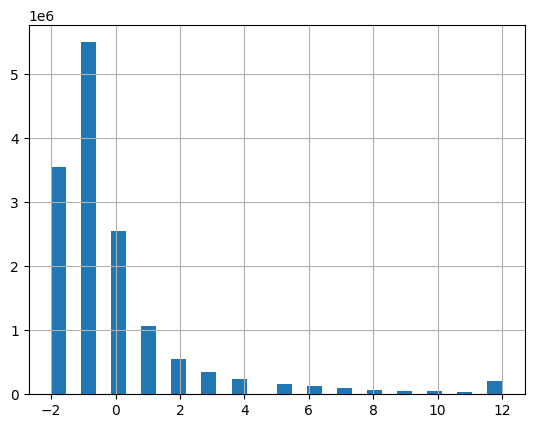

In [24]:
# Arrival delay groups histogram
flights_data['ArrivalDelayGroups'].hist(bins=30)

<AxesSubplot: >

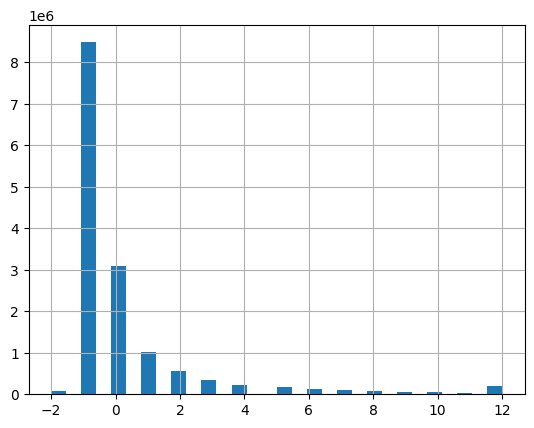

In [25]:
flights_data['DepartureDelayGroups'].hist(bins=30)

--

In [26]:
# print first CRSArrTime value
flights_data['CRSArrTime'].head(1)

0    1328
Name: CRSArrTime, dtype: int64

In [27]:
flights_data['ArrTime'].head(1)

0    1324.0
Name: ArrTime, dtype: float64

In [28]:
# average length of WeatherDelay in minutes
flights_data['WeatherDelay'].mean()

4.090163425485777

In [29]:
# number of weather delays
flights_data['WeatherDelay'].value_counts()

WeatherDelay
0.0       2822748
6.0          3409
15.0         3380
7.0          3248
2.0          3227
           ...   
1773.0          1
1515.0          1
1102.0          1
1596.0          1
1295.0          1
Name: count, Length: 1273, dtype: int64

In [30]:
# average length of CarrierDelay in minutes
flights_data['CarrierDelay'].mean()

24.899714783203187

Weather Delays have an average delay of 4 minutes, lower than carrier delays averaging at 25 minutes and late aircraft delays at 28 minutes.

In [31]:
# average length of NASDelay in minutes
flights_data['NASDelay'].mean()

13.004428471472979

In [32]:
# average length of SecurityDelay in minutes
flights_data['SecurityDelay'].mean()

0.13140202215504257

In [33]:
# average length of LateAircraftDelay in minutes
flights_data['LateAircraftDelay'].mean()

28.846849863266854

Flights are considered delays if over 15 minutes. 

In [34]:
# Dest values
flights_data['Dest'].value_counts()

Dest
ATL    678271
ORD    611617
DEN    610790
DFW    603766
CLT    476524
        ...  
EAR       105
OWB        43
MGW        37
EAU        32
PUB        27
Name: count, Length: 362, dtype: int64

In [35]:
# Origin values
flights_data['Origin'].value_counts()

Origin
ATL    677925
ORD    611731
DEN    611111
DFW    604362
CLT    476299
        ...  
EAR       105
OWB        42
MGW        37
EAU        31
PUB        27
Name: count, Length: 362, dtype: int64

In [36]:
# delay by origin
flights_data.groupby('Origin')['ArrDel15'].mean().sort_values(ascending=False).head(20)

Origin
MGW    0.459459
SCK    0.426386
SMX    0.386792
OWB    0.357143
CKB    0.342233
HGR    0.324649
USA    0.323345
BET    0.316623
PBG    0.316397
HYA    0.313333
BRW    0.312418
IAG    0.304965
ASE    0.300547
FLL    0.289631
BQN    0.287326
OTH    0.281977
LCK    0.278188
MVY    0.276908
EAU    0.275862
MIA    0.275503
Name: ArrDel15, dtype: float64

In [37]:
flights_data.groupby('Dest')['ArrDel15'].mean().sort_values(ascending=False).head(20)

Dest
PSE    0.361042
BQN    0.350659
PVU    0.337280
MGW    0.305556
ASE    0.292006
SJU    0.287981
CMX    0.287195
PQI    0.287111
SCK    0.280651
SFB    0.279119
TTN    0.276825
PGD    0.273239
SMX    0.267943
USA    0.267782
EAU    0.266667
HGR    0.265060
SFO    0.264309
FLL    0.263203
BRW    0.262402
PBI    0.260355
Name: ArrDel15, dtype: float64

In [38]:
flights_data.groupby('Origin')['DepDel15'].mean().sort_values(ascending=False).head(20)

Origin
MGW    0.405405
SCK    0.385277
SMX    0.363208
HGR    0.354709
USA    0.325436
BQN    0.319251
CKB    0.317961
IAG    0.306383
PBG    0.303695
BRW    0.300261
FLL    0.297780
ASE    0.294329
BWI    0.289467
OWB    0.285714
BET    0.284301
OTH    0.277616
SWF    0.266968
BIH    0.265720
MIA    0.265078
MCO    0.264423
Name: DepDel15, dtype: float64

In [39]:
flights_data.groupby('Dest')['DepDel15'].mean().sort_values(ascending=False).head(20)

Dest
PSE    0.388694
BQN    0.361244
PVU    0.326087
EAU    0.300000
SJU    0.298149
TTN    0.293562
SFB    0.278629
MGW    0.277778
ISP    0.273488
BIH    0.268537
FLL    0.267581
CMX    0.263235
MCO    0.260777
USA    0.260627
STX    0.257556
BRW    0.257106
HGR    0.255020
FNT    0.253862
PBI    0.252724
PGD    0.249504
Name: DepDel15, dtype: float64

In [40]:
#OriginStateName values
flights_data['OriginStateName'].value_counts().sort_values(ascending=False)

OriginStateName
Texas                                             1600234
California                                        1498960
Florida                                           1244975
Illinois                                           809565
New York                                           770816
Georgia                                            734853
North Carolina                                     685953
Colorado                                           685868
Virginia                                           567459
Washington                                         437067
Arizona                                            430144
Nevada                                             424610
Pennsylvania                                       362087
Michigan                                           335572
Tennessee                                          306729
New Jersey                                         303356
Massachusetts                                      29538

Lots of people in states like California, Texas, Florida, Illinois, and New York so they will obviously have a lot of flights leaving their state. US territories represent a small number of flights.

All values are either US states or US territories. Don't need to remove any international samples.

In [95]:
flights_data['DestStateName'].value_counts().sort_values(ascending=False)

DestStateName
Texas                                             1598969
California                                        1499759
Florida                                           1244237
Illinois                                           809245
New York                                           770227
Georgia                                            735177
North Carolina                                     686217
Colorado                                           685059
Virginia                                           567083
Washington                                         437341
Arizona                                            430645
Nevada                                             425250
Pennsylvania                                       362341
Michigan                                           335732
Tennessee                                          306844
New Jersey                                         302963
Massachusetts                                      295504


Generally the same as the origin state name. This makes sense as people need to travel back home.

In [92]:
# delays by OriginStateName
flights_data.groupby('OriginStateName')['ArrDel15'].mean().sort_values(ascending=False)

OriginStateName
Puerto Rico                                       0.266874
U.S. Virgin Islands                               0.252449
Maryland                                          0.248945
Florida                                           0.245717
Colorado                                          0.239778
Nevada                                            0.237824
Illinois                                          0.227990
Texas                                             0.225403
New Jersey                                        0.224779
North Carolina                                    0.222501
West Virginia                                     0.220885
Massachusetts                                     0.215676
Connecticut                                       0.200179
Wyoming                                           0.198346
Louisiana                                         0.196565
New York                                          0.196476
Georgia                                 

These are the arrival delays by the origin state. There are lots of delays in Puerto Rico, US Virgin Islands, Maryland, and Florida. These are all either islands or on the east coast. A high volume of delays here could be a result of weather, or popular travel destinations resulting in more delays. Generally, the smaller population states have the fewest delays.

In [93]:
flights_data.groupby('OriginStateName')['DepDel15'].mean().sort_values(ascending=False)

OriginStateName
Maryland                                          0.286662
Puerto Rico                                       0.259767
Colorado                                          0.245401
Nevada                                            0.245347
Florida                                           0.244075
Texas                                             0.229925
U.S. Virgin Islands                               0.223328
New Jersey                                        0.221987
Illinois                                          0.217733
Massachusetts                                     0.212533
North Carolina                                    0.211151
West Virginia                                     0.201081
Georgia                                           0.199947
Louisiana                                         0.198643
Missouri                                          0.197463
Arizona                                           0.195996
New York                                

These are departure delays by origin state. There are generally similar patterns to the arrival delays.

The analysis reveals that airport specific characteristics like, geographic location, and seasonal factors play a significant role in flight delays. Smaller regional airports tend to experience higher delays, possibly due to limited infrastructure and reliance on connecting flights, whereas larger hub airports are more affected by air traffic congestion and operational constraints. Differences between departure and arrival delays suggest distinct contributing factors, where departure delays may be linked to staffing, maintenance, or scheduling, while arrival delays can be influenced by weather and airspace restrictions. Geographic patterns also emerge, with certain states and regions experiencing consistently high delays, likely due to seasonal weather events, tourism demand, or airspace congestion. Airline performance appears to vary from airport to airport, mainly smaller airports facing operational problems and larger airports with congestion and planning.